🚀 Predicting Customer Lifetime Value Using Machine Learning 📊

I recently completed a machine learning project to predict the Customer Lifetime Value (CLV) for over 9,000 customers using their historical interaction data.

✅ Goal: Help businesses identify high-value customers and make smarter marketing decisions.

🔍 My approach:

Cleaned and prepared the dataset with One-Hot Encoding

Explored important features like:

Monthly Premium Auto

Total Claim Amount

Tenure

Built and compared two regression models:

Linear Regression: R² Score = 0.49

Random Forest Regressor: R² Score = 0.88, RMSE = 0.58

📊 Visualized actual vs predicted CLV values to verify model accuracy — results showed the Random Forest model captured the relationships well.

🛠️ Tech Used: Python | Pandas | Scikit-learn | Matplotlib

💡 Impact: This model enables data-driven targeting, personalized retention strategies, and more accurate revenue forecasting.

📂 I’ve shared the full notebook with clean, commented code and visualizations.

Let’s connect if you’re working on customer analytics or want to collaborate!

#DataScience #MachineLearning #CustomerAnalytics #Python #Regression #ScikitLearn #CLV #CustomerLifetimeValue #LinkedInProjects



# Customer Lifetime Value Prediction

This project uses regression techniques to predict the **lifetime value** of customers based on their historical interactions.

**Technologies Used:** Python, Pandas, Scikit-learn

**Goal:** Help businesses identify high-value customers and improve decision-making.

##  Step 1: Load and Explore Dataset
We begin by importing the dataset and performing basic data exploration.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
data = pd.read_csv("/content/drive/MyDrive/dataset/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

##  Step 2: Data Cleaning
We clean the dataset by checking for nulls, duplicates, and converting types as needed.

In [82]:

#data = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [83]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [84]:
data.shape


(9134, 24)

In [85]:
data.isnull().sum()

,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
Effective To Date,0
EmploymentStatus,0
Gender,0
Income,0


##  Step 3: Exploratory Data Analysis (EDA)
Visualize important relationships in the dataset to understand the trends affecting **Customer Lifetime Value (CLV)**.

In [86]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [87]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [88]:
numerical_features = [
    "Customer Lifetime Value", "Income", "Monthly Premium Auto",
    "Months Since Last Claim", "Months Since Policy Inception",
    "Number of Open Complaints", "Number of Policies", "Total Claim Amount"
]

categorical_features = [
    "Response", "Coverage", "Education", "EmploymentStatus", "Gender",
    "Location Code", "Marital Status", "Policy Type", "Renew Offer Type",
    "Sales Channel", "Vehicle Class", "Vehicle Size"
]

boxplot_pairs = [
    ("Customer Lifetime Value", "Response"),
    ("Customer Lifetime Value", "Education"),
    ("Total Claim Amount", "Vehicle Size"),
    ("Total Claim Amount", "Coverage")
]

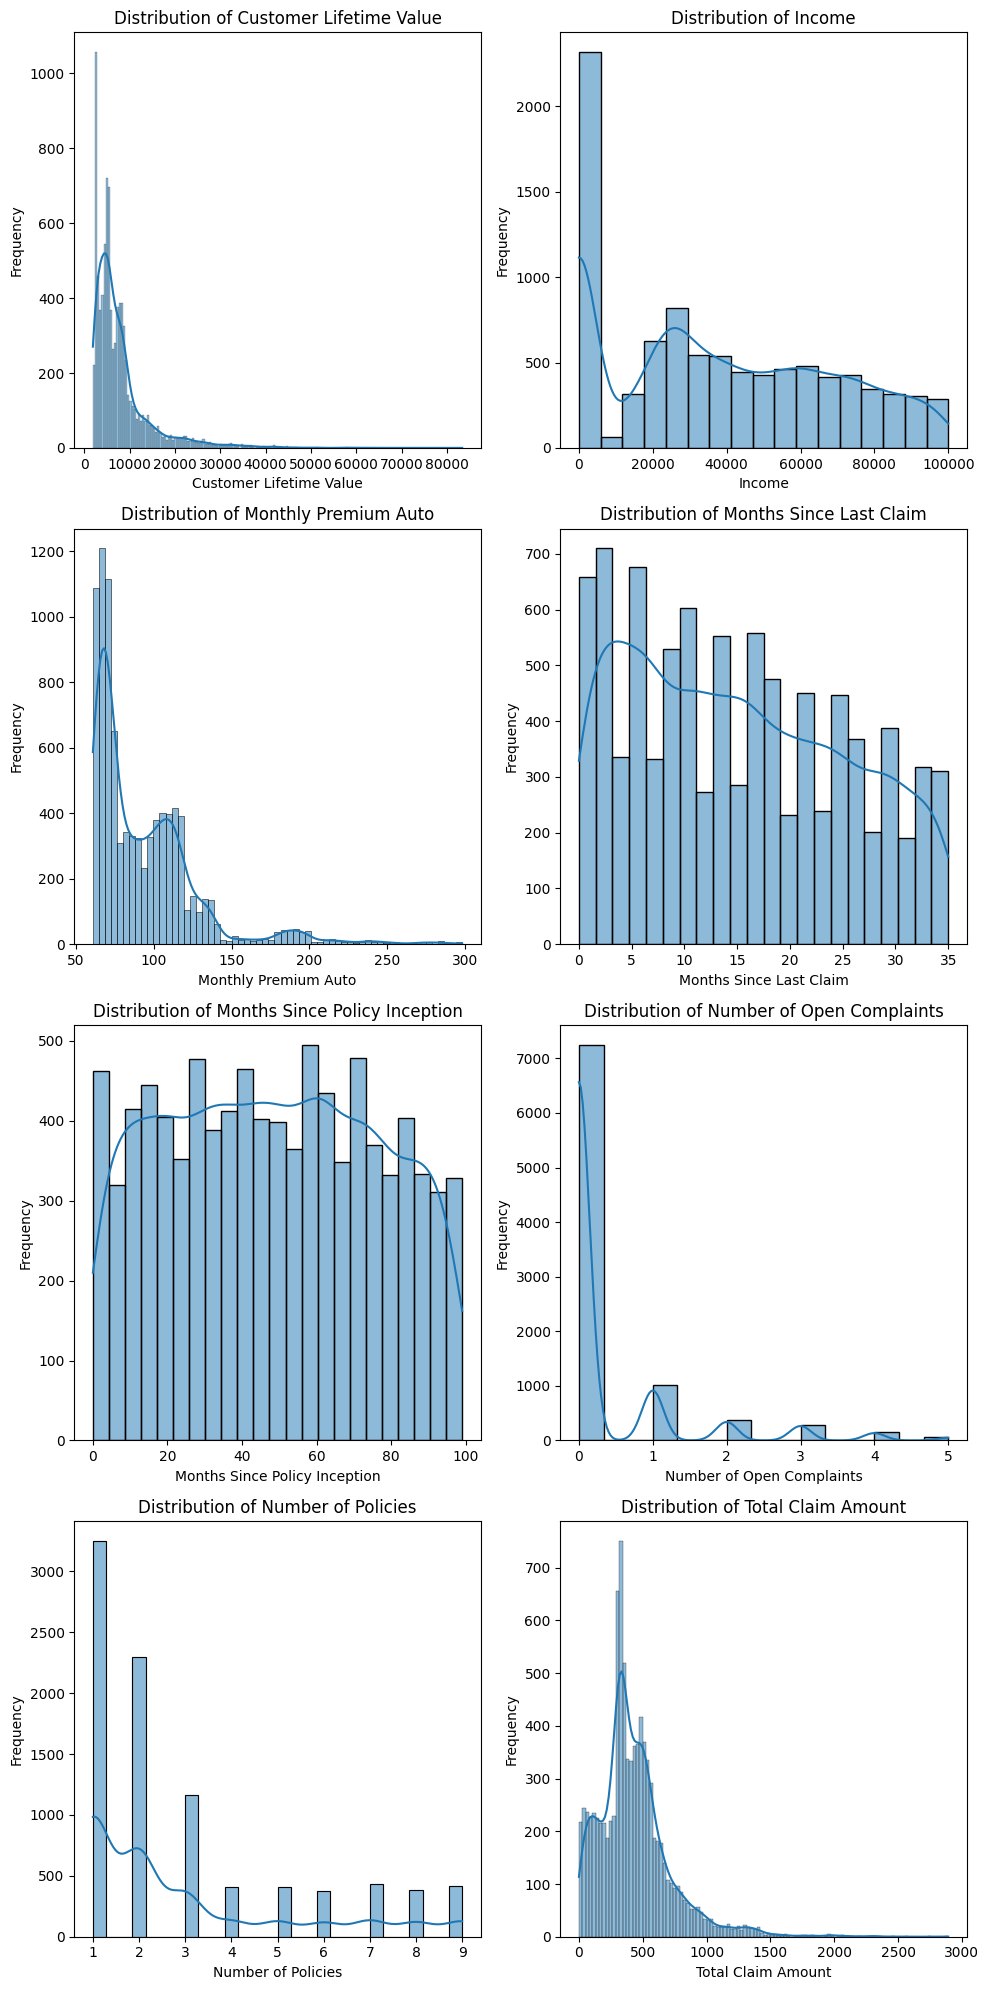

In [89]:
fig  = plt.figure(figsize=(10,20))
axes = fig.subplots(4,2)
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

##  Step 4: Data Preprocessing
We encode categorical variables and split the data for training and testing.

In [90]:
data.drop(columns=["Customer", "Effective To Date"], inplace=True)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [92]:
x = data.drop(columns=["Customer Lifetime Value"])
y = data["Customer Lifetime Value"]

In [93]:
x =  pd.get_dummies(x).astype(int)

In [94]:
x.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,56274,69,32,5,0,1,384,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,94,13,42,0,8,1131,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,48767,108,18,38,0,2,566,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,106,18,65,0,7,529,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,43836,73,12,44,0,1,138,0,0,0,...,0,1,0,0,0,0,0,0,1,0


##  Step 5: Linear Regression Model
Apply Linear Regression to get a baseline performance. 

Between two column 'Monthly Premium Auto' vs 'Customer Lifetime Value'

In [ ]:
X = data[['Monthly Premium Auto']]   # 📊 Input 
y = data['Customer Lifetime Value']  # 🎯 Target 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
model =LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(X_test)

In [99]:
y_pred.shape


(1827,)

In [100]:
X_test.shape, y_test.shape

((1827, 1), (1827,))

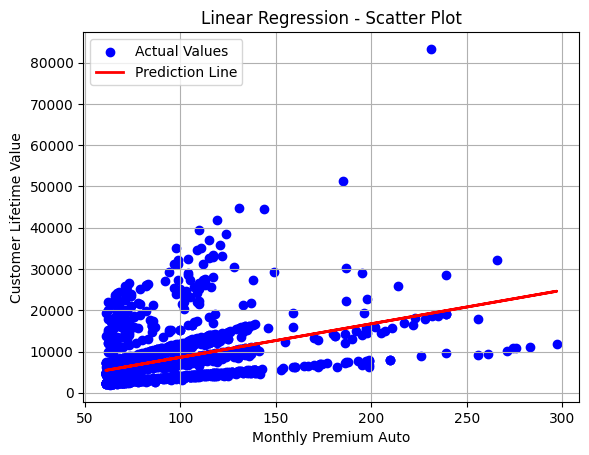

In [101]:
plt.scatter(X_test, y_test, color='blue', label='Actual Values')    # True values
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction Line')  # Prediction line
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Customer Lifetime Value')
plt.title('Linear Regression - Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

## 🌲 Step 6: Random Forest Regressor
Train a more powerful model to improve predictions.

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [106]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 📊 Step 7: Actual vs Predicted Visualization
Compare predicted values to actual values using a scatter plot.

In [107]:
y_pred = model.predict(X_test)


In [111]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error: 13169161.341554342
R² Score: 0.7037699934839231


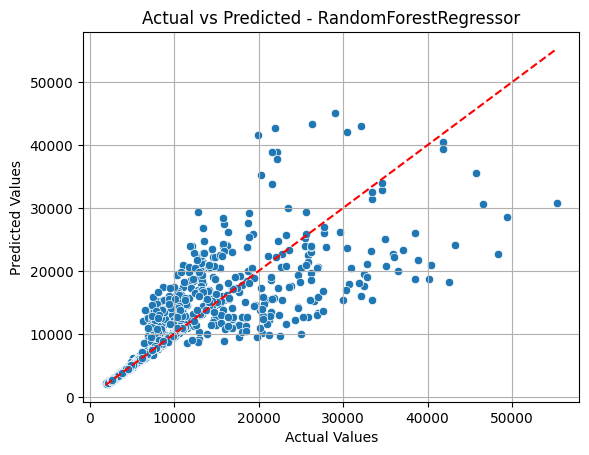

In [112]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - RandomForestRegressor")
plt.grid(True)
plt.show()

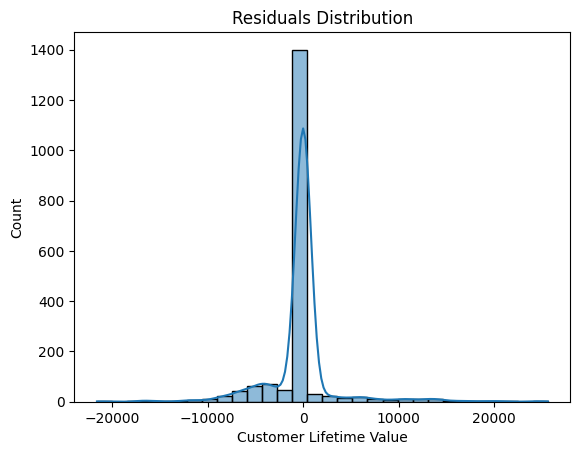

In [115]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.show()


## ✅ Conclusion
Random Forest performs better than Linear Regression, with higher accuracy and better visual fit.

This model can help businesses:
- Target high-value customers
- Optimize marketing spend
- Forecast revenue more accurately